# Demand Projection with Computer Vision

Also includes the NLP from previous module. 

First map Google drive.

In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab


Load the three data files.

In [2]:
import pandas as pd
import os

PATH = "/content/drive/MyDrive/projects/demand/"

df_sales = pd.read_csv("https://data.heatonresearch.com/wustl/CABI/demand-forecast/sales_train.csv", parse_dates=['date'])
df_items = pd.read_csv("https://data.heatonresearch.com/wustl/CABI/demand-forecast/items.csv")
df_resturant = pd.read_csv("https://data.heatonresearch.com/wustl/CABI/demand-forecast/resturants.csv")

### Download Street View Images

In [3]:
!wget https://data.heatonresearch.com/wustl/CABI/demand-forecast/street-20221003.zip /content/
!unzip /content/street-20221003.zip > /dev/null

--2022-10-05 04:33:10--  https://data.heatonresearch.com/wustl/CABI/demand-forecast/street-20221003.zip
Resolving data.heatonresearch.com (data.heatonresearch.com)... 18.160.46.40, 18.160.46.15, 18.160.46.30, ...
Connecting to data.heatonresearch.com (data.heatonresearch.com)|18.160.46.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87856628 (84M) [application/zip]
Saving to: ‘street-20221003.zip’

street-20221003.zip 100%[===================>]  83.79M  76.5MB/s    in 1.1s    

2022-10-05 04:33:11 (76.5 MB/s) - ‘street-20221003.zip’ saved [87856628/87856628]

/content/: Scheme missing.
FINISHED --2022-10-05 04:33:11--
Total wall clock time: 1.3s
Downloaded: 1 files, 84M in 1.1s (76.5 MB/s)


### Install YOLOv5



In [4]:
import sys

!git clone https://github.com/ultralytics/yolov5 --tag 6.2  # clone
!mv /content/6.2 /content/yolov5
%pip install -qr /content/yolov5/requirements.txt  # install
sys.path.insert(0,'/content/yolov5')

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.2-185-ge4398cf Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 37.8/166.8 GB disk)


### Demonstrate YOLOv5



In [5]:
!rm -R /content/yolov5/runs/detect/*
!mkdir /content/images
!cp /content/street/2020_01_01.jpg /content/images

rm: cannot remove '/content/yolov5/runs/detect/*': No such file or directory


detect: weights=['yolov5s.pt'], source=/content/images/, data=yolov5/data/coco128.yaml, imgsz=[1024, 1024], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-185-ge4398cf Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

100% 14.1M/14.1M [00:00<00:00, 123MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /content/images/2020_01_01.jpg: 576x1024 19 persons, 1 handbag, 16.3ms
Speed: 0.7ms pre-process, 16.3ms inference, 38.7ms NMS per image at shape (1, 3, 1024, 1024)
Results saved to yolov5/runs/detect/exp


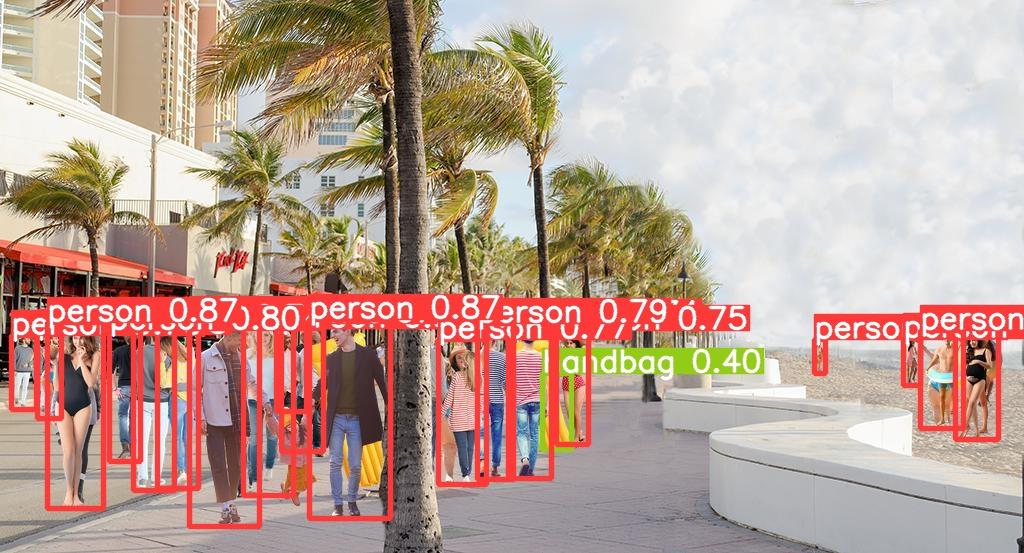

In [6]:
from IPython.display import Image

!python /content/yolov5/detect.py --weights yolov5s.pt --img 1024 \
  --conf 0.25 --source /content/images/

URL = '/content/yolov5/runs/detect/exp/2020_01_01.jpg'
Image(filename=URL, width=300)

In [7]:
import torch

# Model
yolo_model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5n - yolov5x6, custom

# Images
img = '/content/street/2020_01_01.jpg'  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = yolo_model(img)

# Results
df = results.pandas().xyxy[0]
df

/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v6.2-185-ge4398cf Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gra

,xmin,ymin,xmax,ymax,confidence,class,name
0,306.115692,319.090240,388.782013,520.279785,0.890301,0,person
1,191.373291,321.127533,252.125488,527.220032,0.848373,0,person
2,46.171207,321.925354,104.267632,509.273682,0.841066,0,person
3,506.975250,325.658081,552.026306,478.925140,0.818504,0,person
4,955.400696,330.562592,999.585449,440.699127,0.799005,0,person
5,925.962341,333.064362,963.018188,429.911438,0.796718,0,person
6,556.679810,329.984589,588.324036,444.874573,0.787141,0,person
7,439.082245,344.545013,487.994537,486.575195,0.747895,0,person
8,474.166565,326.451904,512.124207,480.685883,0.742727,0,person
9,139.452072,326.367035,194.633728,488.645355,0.671173,0,person


### Extract Data from Street Images

In [8]:
import os
from os import walk
import datetime
import tqdm
import pandas as pd

STREET_PATH = "/content/street/"

filenames = next(walk(STREET_PATH), (None, None, []))[2]  

list_date = []
list_people = []

for file in tqdm.tqdm(filenames):
  filename = os.path.join(STREET_PATH, file)
  results = yolo_model(filename)
  df = results.pandas().xyxy[0]
  people = len(df[df.name=='person'])
  dt = datetime.datetime.strptime(file[:10], '%Y_%m_%d')
  list_date.append(dt)
  list_people.append(people)

df_street_view = pd.DataFrame({'date':list_date,'people':list_people})
df_street_view

100%|██████████| 731/731 [00:26<00:00, 27.75it/s]


,date,people
0,2020-03-05,18
1,2021-03-04,21
2,2021-02-05,20
3,2020-05-14,17
4,2021-03-25,19
...,...,...
726,2020-02-10,16
727,2020-12-18,13
728,2020-09-16,22
729,2021-07-10,20


# Neural Network Code from Last Module

In [9]:
def process_title(model, name):
  v = None
  i = 0
  for word in name.split(' '):
    if word == 'vegi': word = "vegetable"
    if word == 'smoothy': word = "malt"
    i+=1
    if v is None:
      v=model[word].copy()
    else:
      v+=model[word]
  v/=i
  return v

def series_to_supervised(data, window=1, lag=1, dropnan=True):
    cols, names = list(), list()
    # Input sequence (t-n, ... t-1)
    for i in range(window, 0, -1):
        cols.append(data.shift(i))
        names += [('%s(t-%d)' % (col, i)) for col in data.columns]
    # Current timestep (t=0)
    cols.append(data)
    names += [('%s(t)' % (col)) for col in data.columns]
    # Target timestep (t=lag)
    cols.append(data.shift(-lag))
    names += [('%s(t+%d)' % (col, lag)) for col in data.columns]
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
    
def drop_column(df, col):
  columns_to_drop = [('%s(t+%d)' % (col, future_span))]
  for i in range(window, 0, -1):
      columns_to_drop += [('%s(t-%d)' % (col, i))]
  df.drop(columns_to_drop, axis=1, inplace=True, errors='ignore')
  df.drop([f"{col}(t)"], axis=1, inplace=True, errors='ignore')

def cat_seq(df, col):
  return to_categorical(df[col].values)

### Load the Glove Embeddings

In [10]:
!wget -c "https://nlp.stanford.edu/data/glove.6B.zip"
!unzip /content/glove.6B.zip

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = '/content/glove.6B.300d.txt'
tmp_file = get_tmpfile("test_word2vec.txt")
_ = glove2word2vec(glove_file, tmp_file)
w2vec_model = KeyedVectors.load_word2vec_format(tmp_file)

--2022-10-05 04:34:13--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-10-05 04:34:13--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.01MB/s    in 2m 39s  

2022-10-05 04:36:53 (5.17 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  /content/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
 

'pattern' package not found; tag filters are not available for English
adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)
converting 400000 vectors from /content/glove.6B.300d.txt to /tmp/test_word2vec.txt
loading projection weights from /tmp/test_word2vec.txt
loaded (400000, 300) matrix from /tmp/test_word2vec.txt


In [11]:
item_lookup = {}
for i, name in zip(list(df_items.id),list(df_items.name)):
  v = process_title(w2vec_model,name)
  item_lookup[i] = v

# Join the items and sales tables so that we can look up the store id for each item.
df_items2 = df_items[['id','store_id']]
df_train = df_sales.merge(df_items2,left_on='item_id',right_on='id')
df_train[['date','item_id','item_count','store_id']]

# Merge people counts (new)
temp = len(df_train)
df_train = df_train.merge(df_street_view)
assert len(df_train) == temp

# Sort/agg
df_train = df_train.sort_values('date').groupby(['item_id', 'store_id', 'date'], as_index=False)
df_train = df_train.agg({'item_count':['mean'],'people':['mean']})
df_train.columns = ['item', 'store', 'date', 'sales','people']
df_train.head()

,item,store,date,sales,people
0,1,4,2020-12-01,1.0,15.0
1,1,4,2021-10-14,1.0,16.0
2,2,4,2020-04-30,1.0,17.0
3,2,4,2020-06-09,1.0,20.0
4,2,4,2020-12-26,1.0,15.0


# Engineer Time Series Features (new):

In [12]:
df_train['dow'] = df_train['date'].dt.dayofweek
df_train['doy'] = df_train['date'].dt.dayofyear
df_train

,item,store,date,sales,people,dow,doy
0,1,4,2020-12-01,1.0,15.0,1,336
1,1,4,2021-10-14,1.0,16.0,3,287
2,2,4,2020-04-30,1.0,17.0,3,121
3,2,4,2020-06-09,1.0,20.0,1,161
4,2,4,2020-12-26,1.0,15.0,5,361
...,...,...,...,...,...,...,...
15636,100,2,2021-08-10,1.0,20.0,1,222
15637,100,2,2021-11-08,1.0,16.0,0,312
15638,100,2,2021-11-20,1.0,19.0,5,324
15639,100,2,2021-12-03,1.0,18.0,4,337


# Build the sequence data.

In [13]:
window = 29
future_span = 30
series = series_to_supervised(df_train.drop('date', axis=1), window=window, lag=future_span)

# Remove edge cases, where there were not enough values to complete a series
last_item = 'item(t-%d)' % window
last_store = 'store(t-%d)' % window
last_dow = 'dow(t-%d)' % window
last_doy = 'doy(t-%d)' % window
series = series[(series['store(t)'] == series[last_store])]
series = series[(series['item(t)'] == series[last_item])]

We will predict with sales, and our engineered features.

In [14]:
import numpy as np
from keras.utils.np_utils import to_categorical   

# Label
labels_col = 'sales(t+%d)' % future_span
labels = series[labels_col]
series.drop(labels_col, axis=1, inplace=True)
series.drop('item(t+%d)' % future_span, axis=1, inplace=True)
series.drop('store(t+%d)' % future_span, axis=1, inplace=True)
series.drop('dow(t+%d)' % future_span, axis=1, inplace=True)
series.drop('doy(t+%d)' % future_span, axis=1, inplace=True)
series.drop('people(t+%d)' % future_span, axis=1, inplace=True)

# Get sales sequences
series2 = series.copy()
drop_column(series2, "item")
drop_column(series2, "store")
drop_column(series2, "dow")
drop_column(series2, "doy")
drop_column(series2, "people")
sales_series = series2.values

# Day of week as a number
series2 = series.copy()
drop_column(series2, "item")
drop_column(series2, "store")
drop_column(series2, "doy")
drop_column(series2, "sales")
drop_column(series2, "people")
dow_series = series2.values

# Get day of year sequences
series2 = series.copy()
drop_column(series2, "item")
drop_column(series2, "store")
drop_column(series2, "dow")
drop_column(series2, "sales")
drop_column(series2, "people")
doy_series = series2.values

# Get number of people sequences
series2 = series.copy()
drop_column(series2, "item")
drop_column(series2, "store")
drop_column(series2, "dow")
drop_column(series2, "sales")
drop_column(series2, "doy")
people_series = series2.values


# Create x
t1 = sales_series.reshape(sales_series.shape + (1,))
t2 = dow_series.reshape(dow_series.shape + (1,)) 
t3 = doy_series.reshape(doy_series.shape + (1,))
t4 = people_series.reshape(people_series.shape + (1,))
x1 = np.concatenate([t1,t2,t3],axis=2)



In [15]:
print(t1.shape)
print(t2.shape)
print(t3.shape)
print(t4.shape)

(13813, 30, 1)
(13813, 30, 1)
(13813, 30, 1)
(13813, 30, 1)


In [16]:
# Create predictors (x)
vec_size = w2vec_model['test'].shape[0]

lst = []
for item in list(series['item(t-1)']):
  lst.append(item_lookup[item])

x2 = np.concatenate(lst).reshape((series.shape[0],vec_size))

x = [x1,x2]

# Train the Network
Extract the predictors (x sequences) and the label (future prediction)

In [17]:
TEST_SIZE = 0.4

mask = np.random.random(size=x[0].shape[0])<TEST_SIZE

X_train = []
X_valid = []

for subx in x:
  X_train.append(subx[~mask])
  X_valid.append(subx[mask])

Y_train = labels.values[~mask]
Y_valid = labels.values[mask]

print('Train set shape x1:', X_train[0].shape)
print('Train set shape x2:', X_train[1].shape)
print('Validation set shape x1:', X_valid[0].shape)
print('Validation set shape x2:', X_valid[1].shape)

Train set shape x1: (8212, 30, 3)
Train set shape x2: (8212, 300)
Validation set shape x1: (5601, 30, 3)
Validation set shape x2: (5601, 300)


Construct the neural network.

In [18]:
import tensorflow as tf 
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten, Dropout, concatenate, Input
import keras

epochs = 500
batch = 256
lr = 0.0003
adam = tf.keras.optimizers.Adam(lr)

model = Sequential()

A1 = Input(shape=(X_train[0].shape[1], X_train[0].shape[2]),name='A1')
A2 = Conv1D(filters=64, kernel_size=8, activation='relu')(A1)
A3 = MaxPooling1D(pool_size=4)(A2)
A4 = Flatten()(A3)
A5 = Dense(50, activation='relu')(A4)
A6 = Dropout(0.2)(A5)

B1 = Input(shape=X_train[1].shape[1],name='B1')
B2 = Dense(16, activation='relu',name='B2')(B1)

M1 = concatenate([A6,B2])
M2 = Dense(1,name='M2')(M1)

model = Model(inputs=[A1, B1],outputs=[M2])
model.compile(loss='mse', optimizer=adam)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 A1 (InputLayer)                [(None, 30, 3)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 23, 64)       1600        ['A1[0][0]']                     
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 5, 64)        0           ['conv1d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 320)          0           ['max_pooling1d[0][0]']          
                                                                                              

Fit the neural network.

In [19]:
from keras.callbacks import EarlyStopping

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=50, 
        verbose=1, mode='auto', restore_best_weights=True)

cnn_history = model.fit(X_train, Y_train, callbacks=[monitor],
    validation_data=(X_valid, Y_valid), epochs=epochs, verbose=2)

Epoch 1/500
257/257 - 4s - loss: 576.1572 - val_loss: 259.5711 - 4s/epoch - 15ms/step
Epoch 2/500
257/257 - 1s - loss: 280.5862 - val_loss: 187.7046 - 970ms/epoch - 4ms/step
Epoch 3/500
257/257 - 1s - loss: 230.6031 - val_loss: 164.0787 - 973ms/epoch - 4ms/step
Epoch 4/500
257/257 - 1s - loss: 199.6734 - val_loss: 156.3852 - 972ms/epoch - 4ms/step
Epoch 5/500
257/257 - 1s - loss: 208.2583 - val_loss: 153.3915 - 961ms/epoch - 4ms/step
Epoch 6/500
257/257 - 1s - loss: 200.4784 - val_loss: 169.2598 - 960ms/epoch - 4ms/step
Epoch 7/500
257/257 - 1s - loss: 191.8445 - val_loss: 143.7899 - 1s/epoch - 4ms/step
Epoch 8/500
257/257 - 1s - loss: 188.4310 - val_loss: 158.7293 - 956ms/epoch - 4ms/step
Epoch 9/500
257/257 - 1s - loss: 191.7371 - val_loss: 140.7249 - 1s/epoch - 5ms/step
Epoch 10/500
257/257 - 1s - loss: 180.0014 - val_loss: 140.2684 - 981ms/epoch - 4ms/step
Epoch 11/500
257/257 - 1s - loss: 174.8940 - val_loss: 138.8511 - 960ms/epoch - 4ms/step
Epoch 12/500
257/257 - 1s - loss: 178.

Predict and evaluate the validation data.

In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np

cnn_train_pred = model.predict(X_train)
cnn_valid_pred = model.predict(X_valid)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, cnn_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, cnn_valid_pred)))

Train rmse: 7.621558074692349
Validation rmse: 9.104936530693095


Train rmse: 8.260069977016887
Validation rmse: 10.943058830677673

Plot the training curve.

In [21]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(cnn_history.history['loss'], label='Train loss')
plt.plot(cnn_history.history['val_loss'], label='Validation loss')
fig.legend()
fig.suptitle('CNN')
plt.xlabel("Epochs")
plt.ylabel("MSE")

plt.show()